<h1><b><font color = black><a id='division_ID0'>2001 - 2010 INDIA MURDER STATISTICS</a></font></b></h1><br>
<b>Built by Arijit Roy, Arkadeep Roy, Soumodip Ghosh, Ankita Datta, Shayani Das</b>
<br><b>Guidance - Indranil Das, Technical Analyst, Webskitters Academy</b>
<br><b>In Association with Webskitters Academy</b>
<br><b>Hooghly Engineering & Technology College</b>

<p><b>Download Dataset Dependency - <a href = "https://drive.google.com/drive/folders/1DIpYG6UgWFfz0mklZMR2CIAF86YAJ_-p?usp=sharing">Click here</a></b></p>

<h3><b>Contents</b></h3>

[Data Collection](#division_ID1) | [Data Preprocessing](#division_ID2) | [Data Visualization](#division_ID3)

<h2><a id='division_ID1'>Data Collection</a></h2>

[MENU](#division_ID0)

In [1]:
# import dataset from local repository
import pandas as pd
df = pd.read_csv('murder.csv')
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,3. Total,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,3. Total,19.0,176,1.0,NaN,2.0,91.0,63.0


<h2><a id='division_ID2'>Data Preprocessing</a></h2>

[MENU](#division_ID0)

In [2]:
# check for null values in the dataframe
df.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

In [3]:
# fill the null values with 0
df.fillna(0, inplace = True)

In [4]:
# drop unneccesary column
df.drop(['Group_Name', 'Sub_Group_Name'], axis = 1, inplace = True)

In [5]:
# change column datatypes to integer
df.iloc[:, [2, 4, 5, 6, 7, 8]] = df.iloc[:, [2, 4, 5, 6, 7, 8]].astype(int)

In [6]:
# rename columns
dict_col = {
    'Victims_Above_50_Yrs': '>50 years',
    'Victims_Upto_10_15_Yrs': '10-15 years',
    'Victims_Upto_10_Yrs': '<10 years',
    'Victims_Upto_15_18_Yrs': '15-18 years',
    'Victims_Upto_18_30_Yrs': '18-30 years',
    'Victims_Upto_30_50_Yrs': '30-50 years'
}
murder = df.rename(columns = dict_col)
murder

,Area_Name,Year,>50 years,Victims_Total,10-15 years,<10 years,15-18 years,18-30 years,30-50 years
0,Andaman & Nicobar Islands,2001,0,6,0,0,0,4,2
1,Andhra Pradesh,2001,67,607,15,38,43,269,175
2,Arunachal Pradesh,2001,2,16,0,0,0,10,4
3,Assam,2001,11,128,8,4,23,45,37
4,Bihar,2001,12,366,0,0,40,191,123
...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,327,1908,13,63,16,650,839
1014,Tripura,2010,24,159,2,0,0,60,73
1015,Uttar Pradesh,2010,344,4456,82,138,126,2358,1408
1016,Uttarakhand,2010,19,176,1,0,2,91,63


<h2><a id='division_ID3'>Data Visualization</a></h2>

[MENU](#division_ID0)

- <h3><b>2001 - 2010 Age classes of Murder Victims</b></h3>

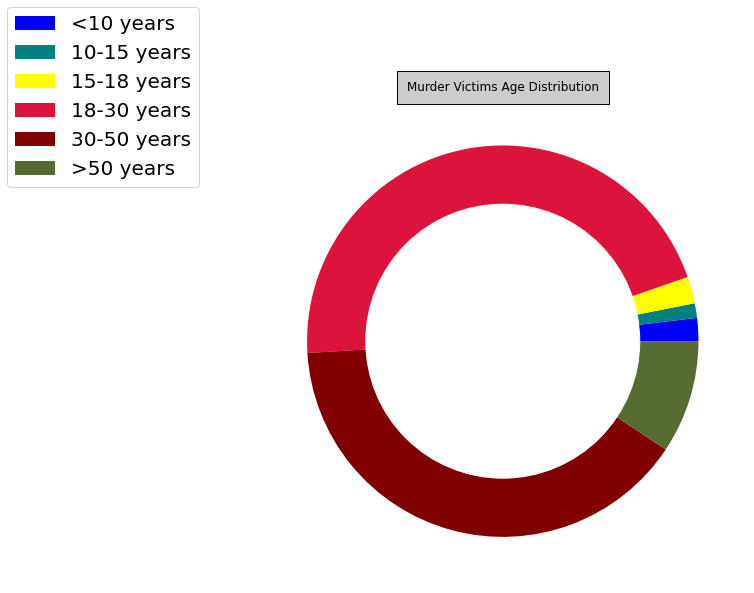

In [7]:
import matplotlib.pyplot as plt
indices = [5, 4, 6, 7, 8, 2]
victims = []
victim_ages = []
for i in indices:
    victims.append(murder.iloc[:, i].sum())
    victim_ages.append(list(murder.columns)[i])
colors = ['blue', 'teal', 'yellow', 'crimson', 'maroon', 'darkolivegreen']
plt.figure(figsize = (16, 9))
plt.title('Murder Victims Age Distribution', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
plt.pie(victims, colors = colors)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(victim_ages, loc = 'center right', bbox_to_anchor = (-0.1, 1.), fontsize=20)
plt.show()

- <h3><b>Statewise comparison of 2001 - 2010 Murders</b></h3>

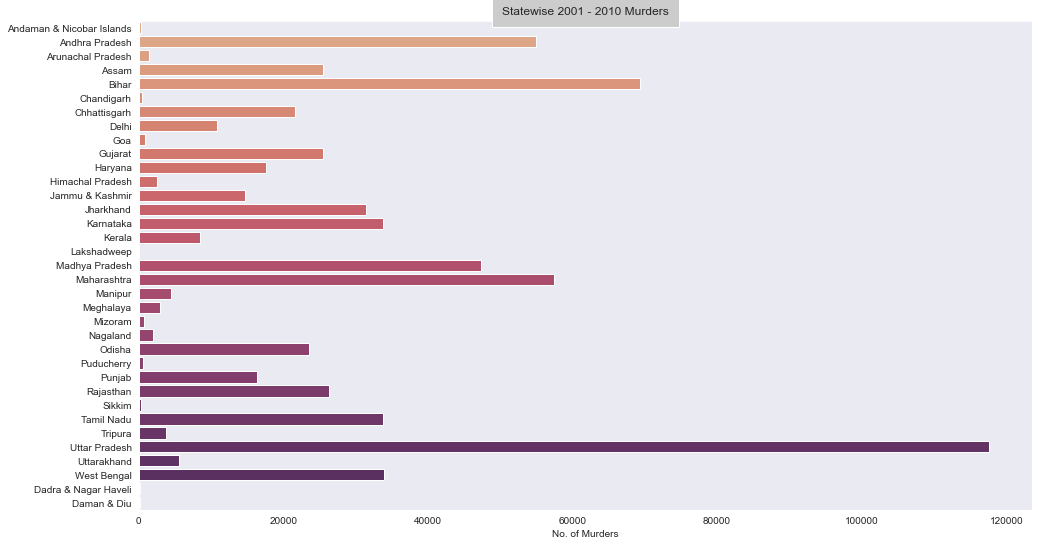

In [8]:
import seaborn as sns
area_names = df.iloc[:, 0].unique()
murders = []
for i in area_names:
    murders.append(df[df.iloc[:, 0] == i].iloc[:, 3].sum())
sns.set_style("dark")
plt.figure(figsize = (16, 9))
sns.barplot(y = area_names, x = murders, palette = 'flare')
plt.xlabel('No. of Murders')
plt.title('Statewise 2001 - 2010 Murders', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
plt.show()

- <h3><b>2001 - 2010 yearwise Murder (Statewise)</b></h3>

In [9]:
def state_murder_stats(state_name):
    new = df[df.iloc[:, 0] == state_name].copy()
    timeline = df.iloc[:, 1].unique()
    yearwise_crime = []
    for i in timeline:
        yearwise_crime.append(new[new.iloc[:, 1] == i].iloc[:, 3].sum())
    plt.figure(figsize = (16, 9))
    sns.barplot(x = timeline, y = yearwise_crime, palette = 'RdYlGn_r')
    tt = state_name + ' 2001 - 2010 Murder Statistics'
    plt.xlabel('Timeline')
    plt.ylabel('No. of Murder')
    plt.title(tt, bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
    plt.show()

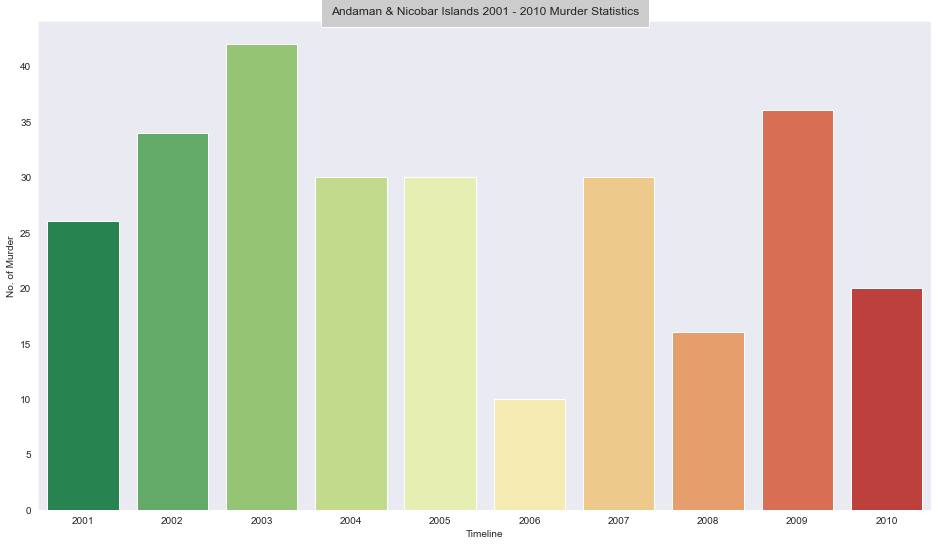

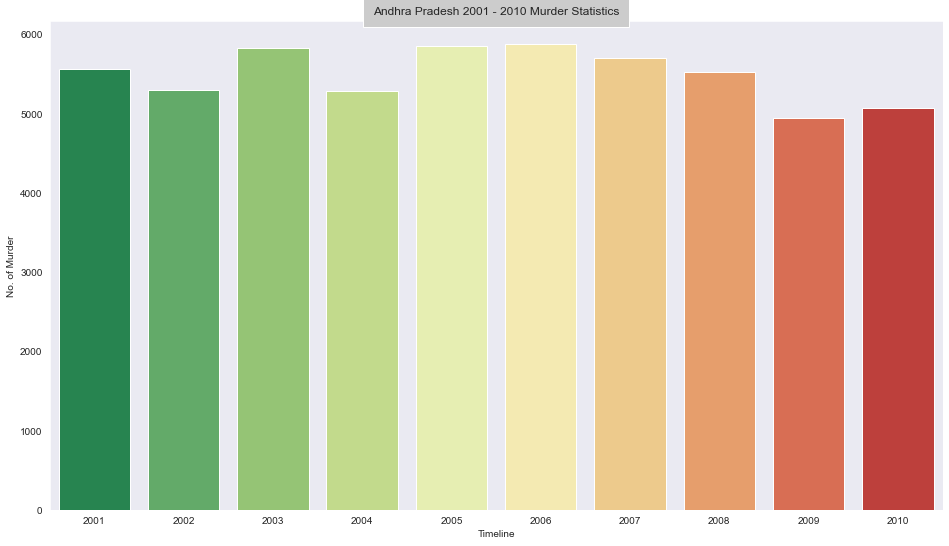

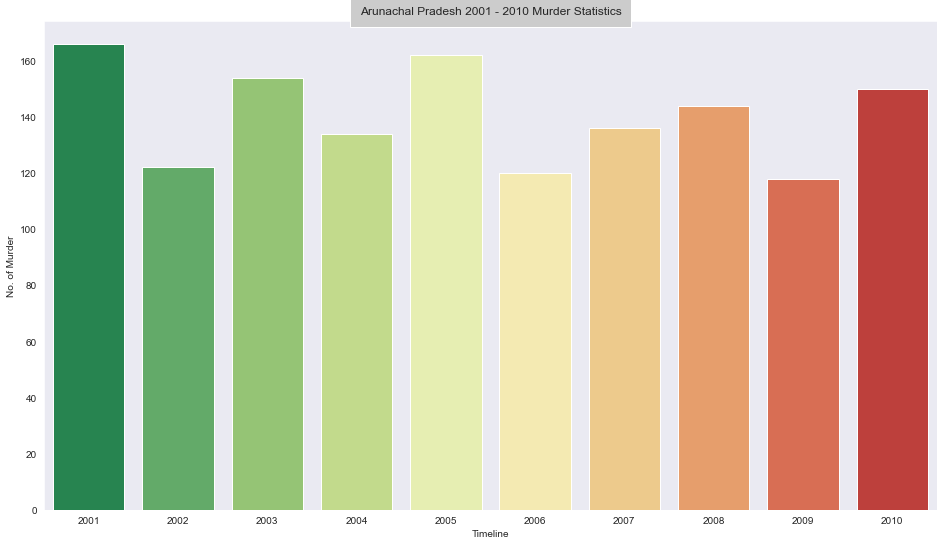

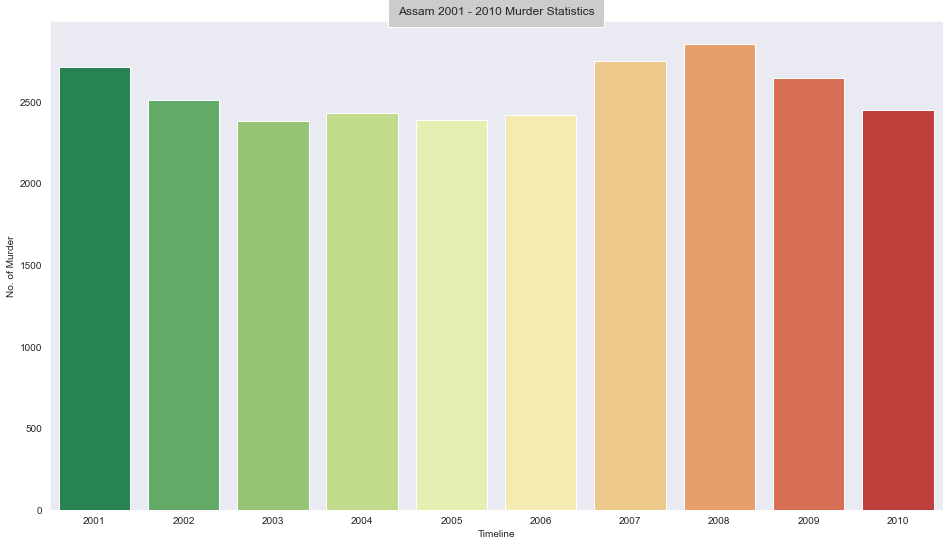

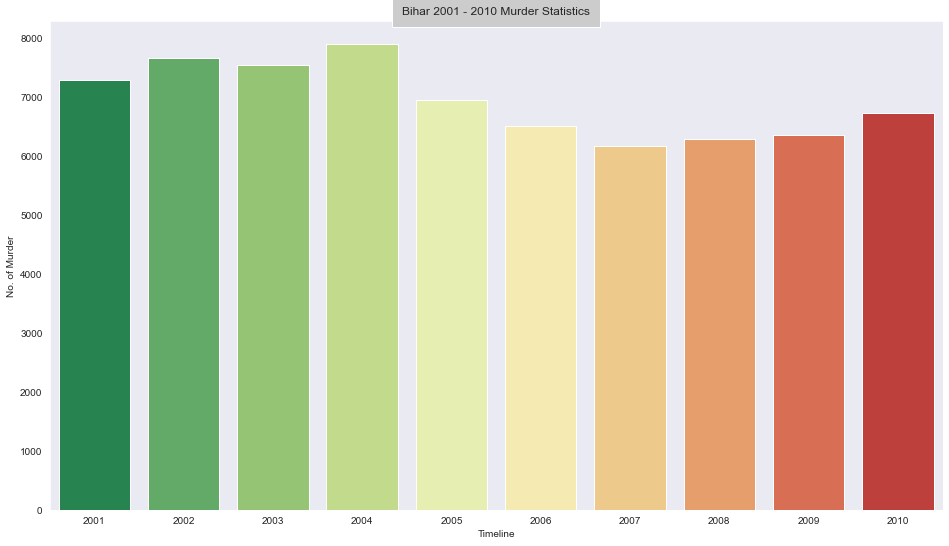

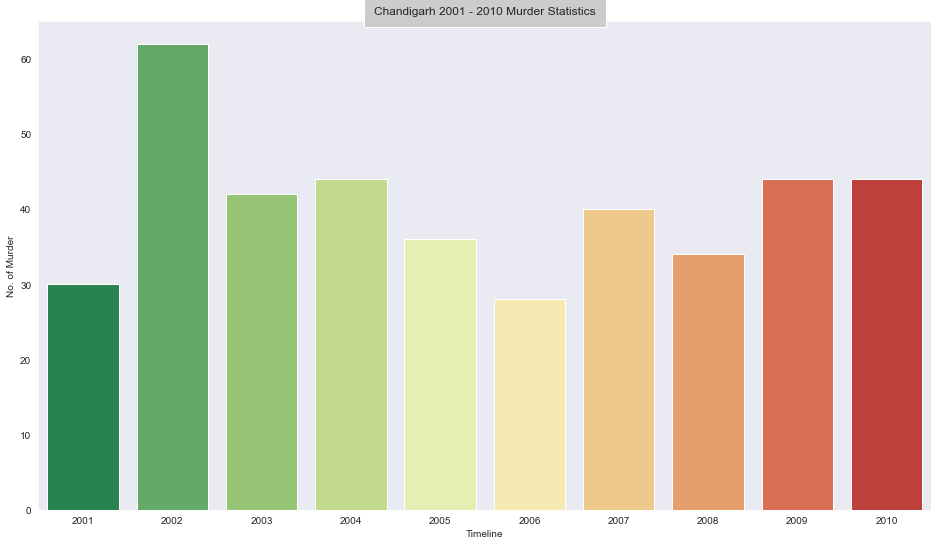

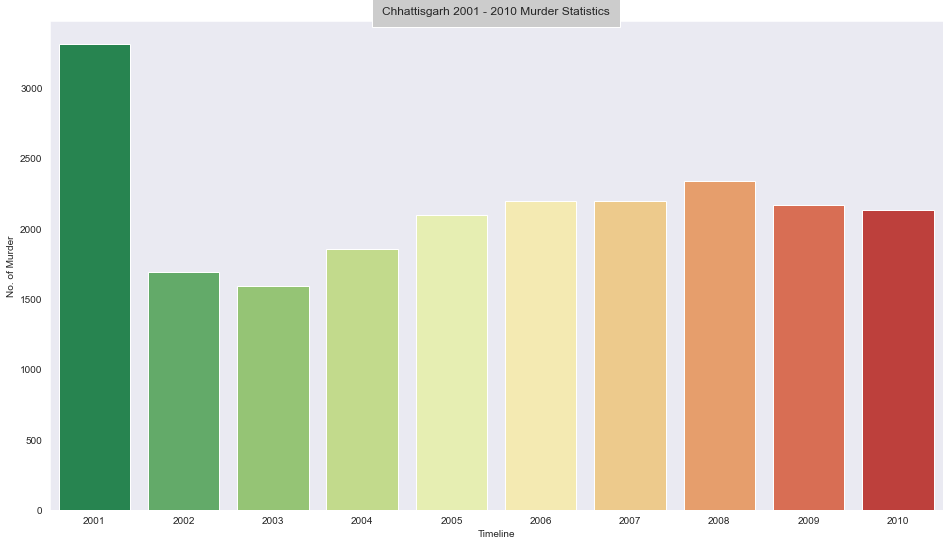

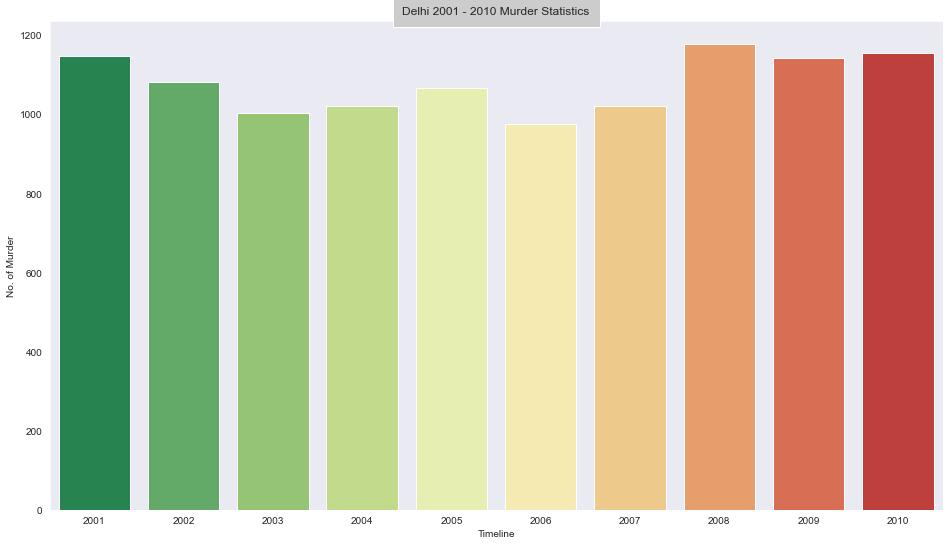

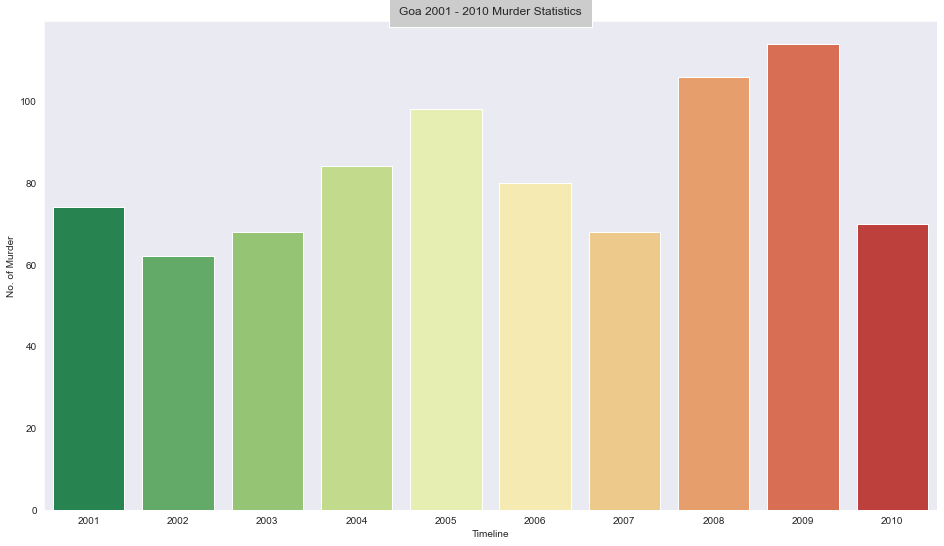

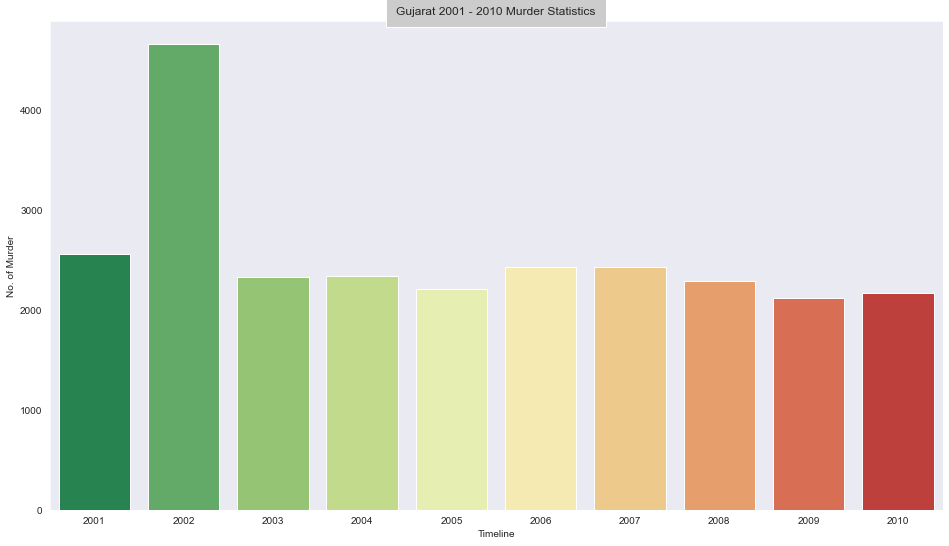

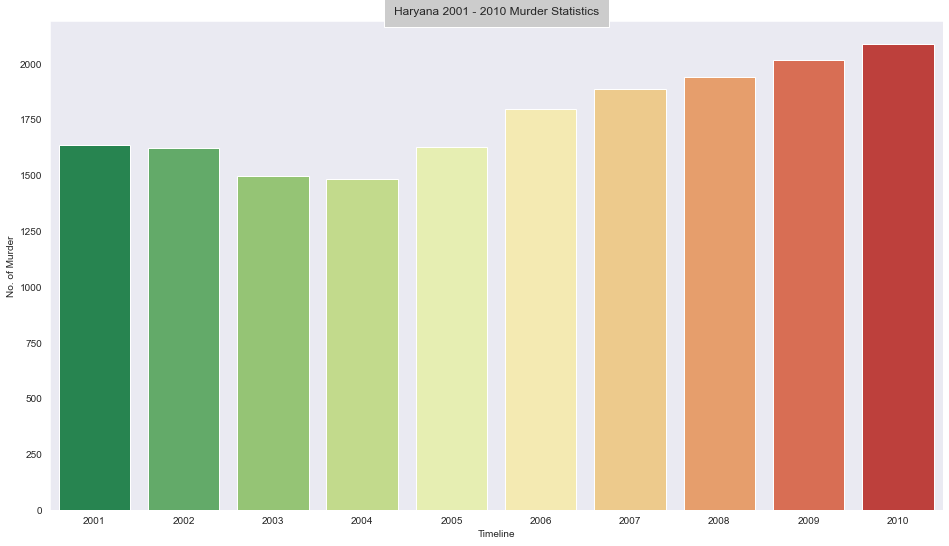

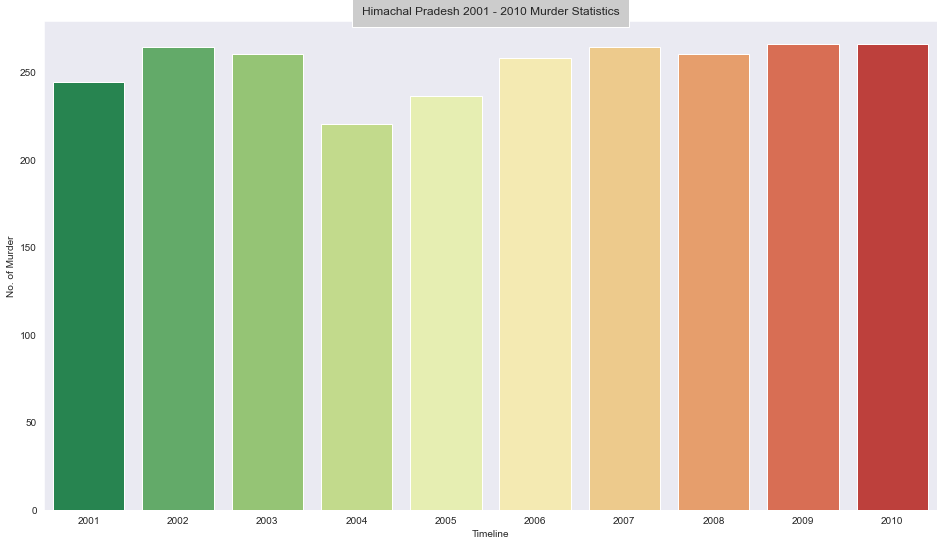

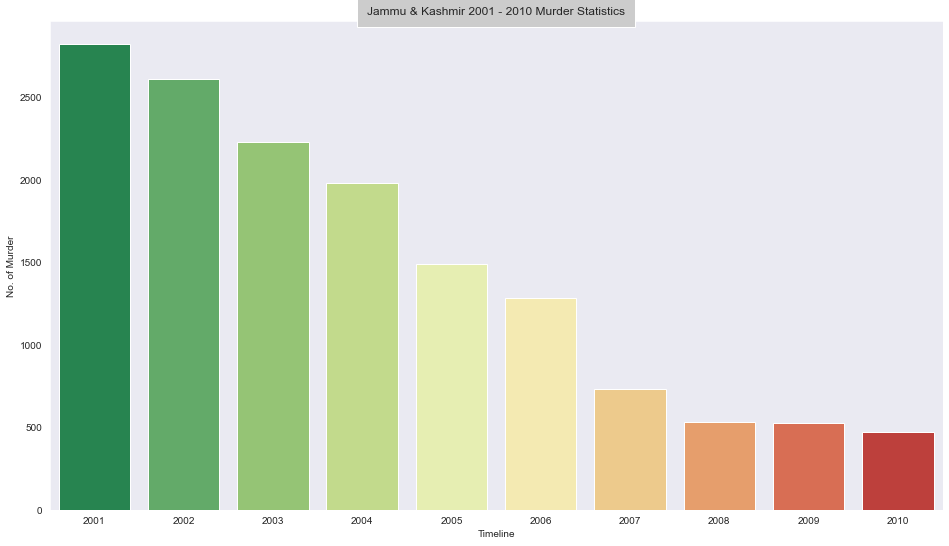

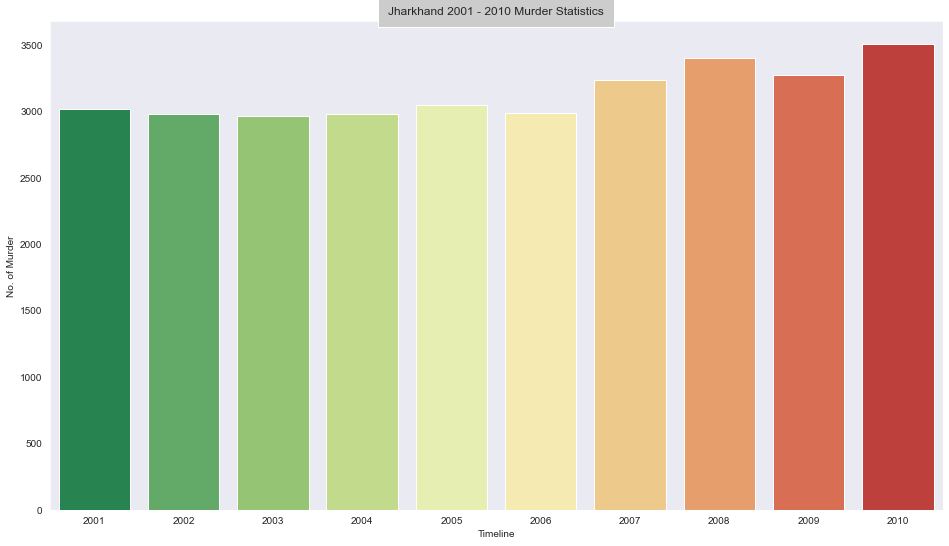

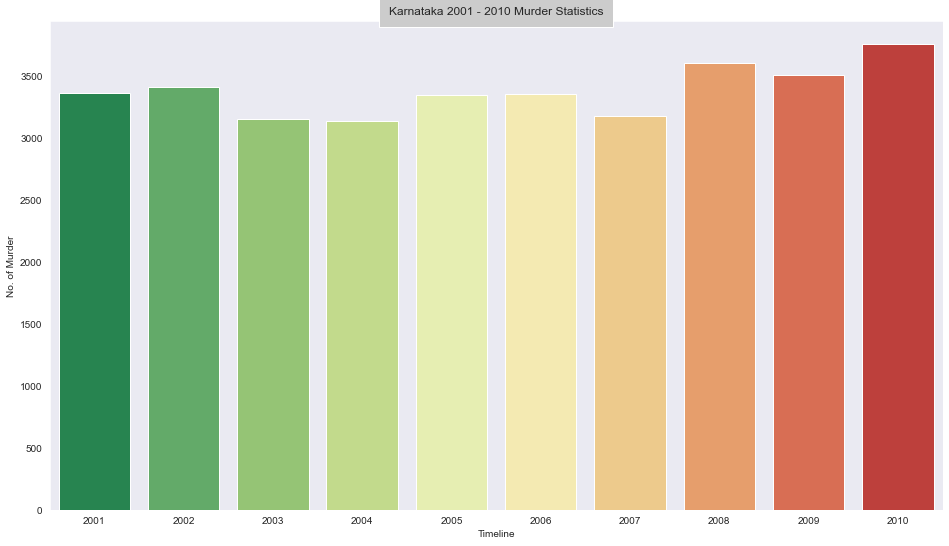

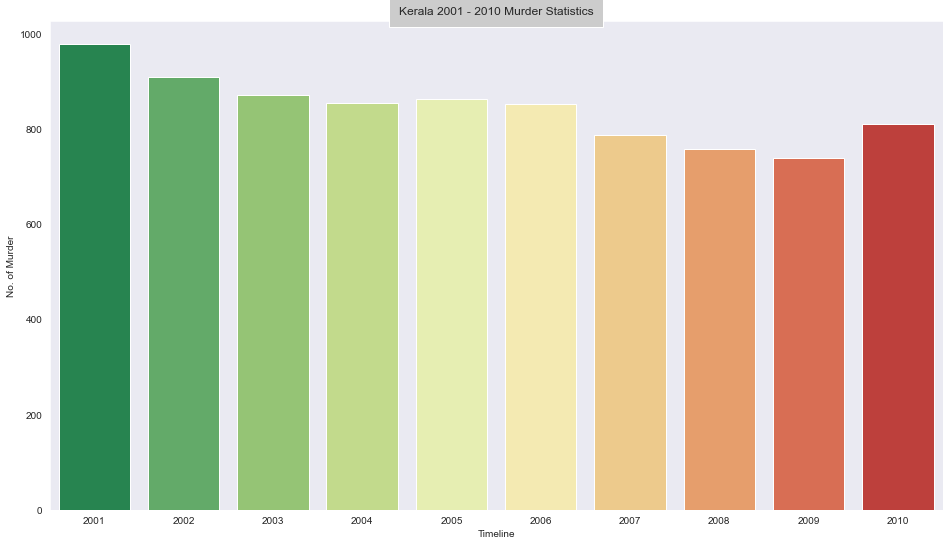

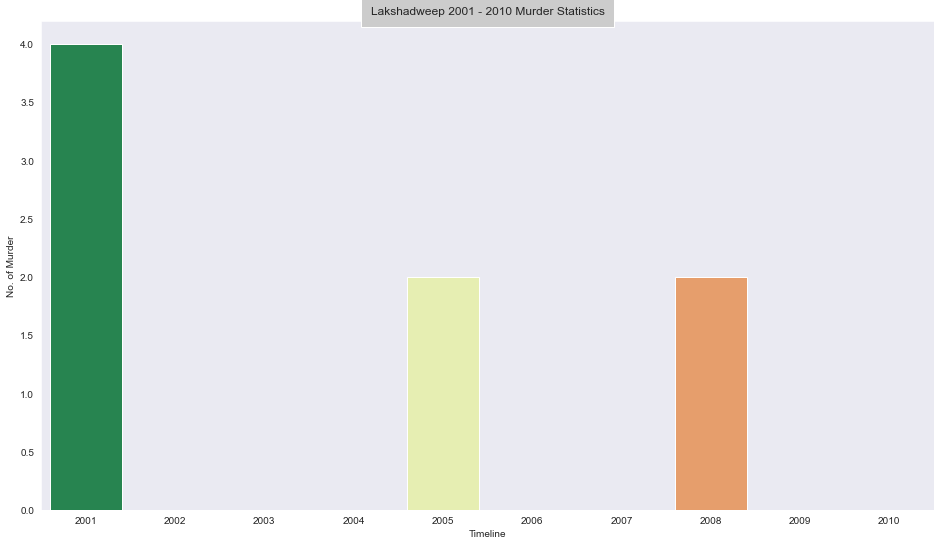

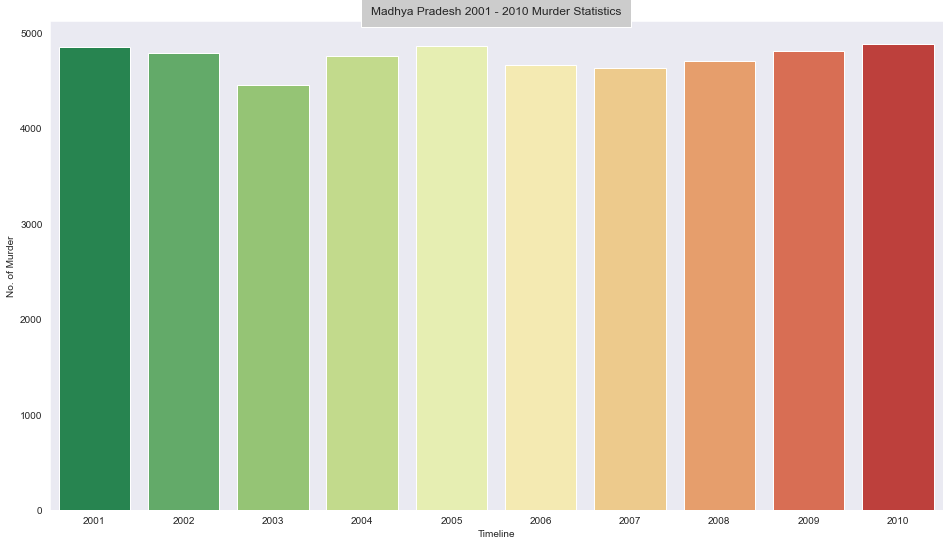

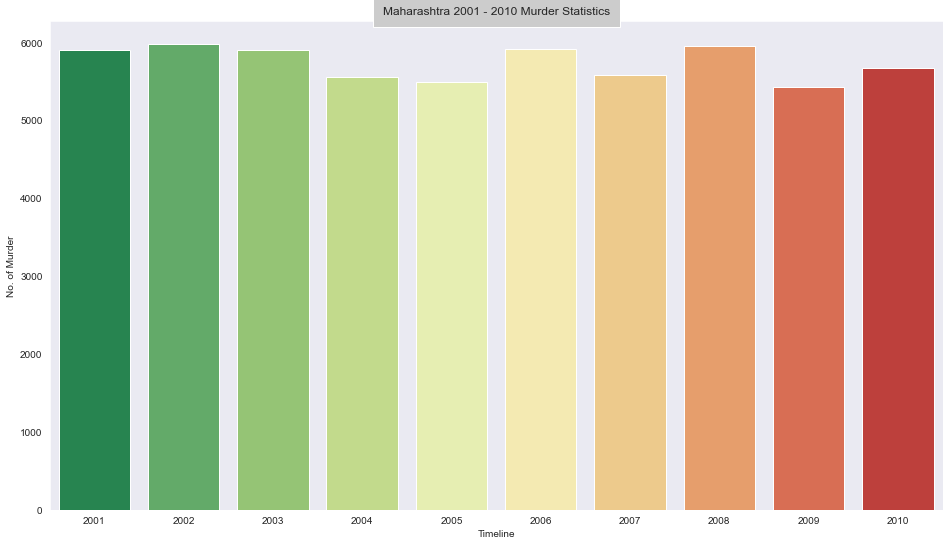

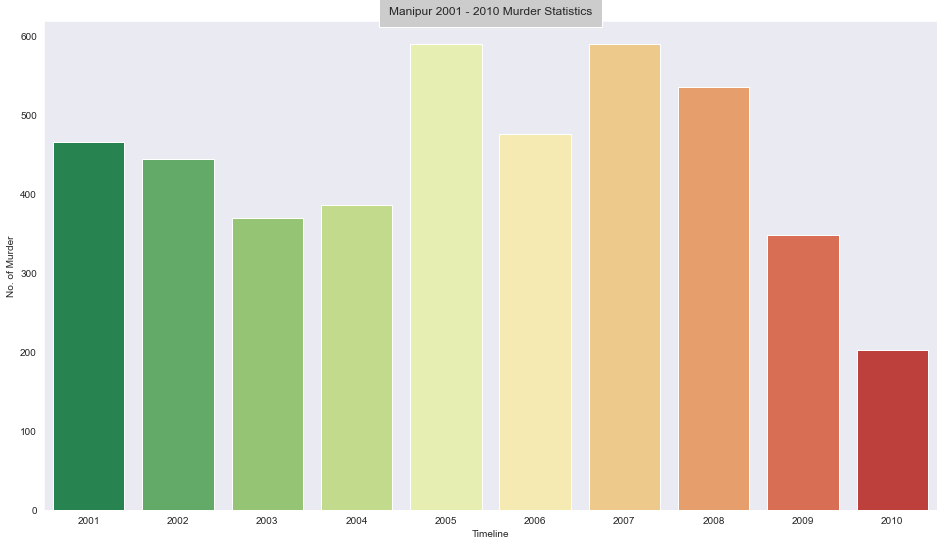

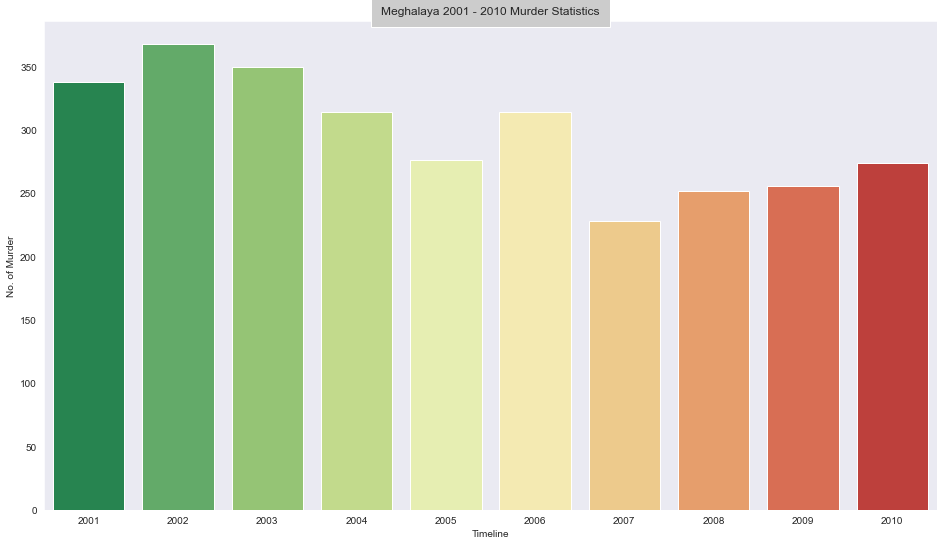

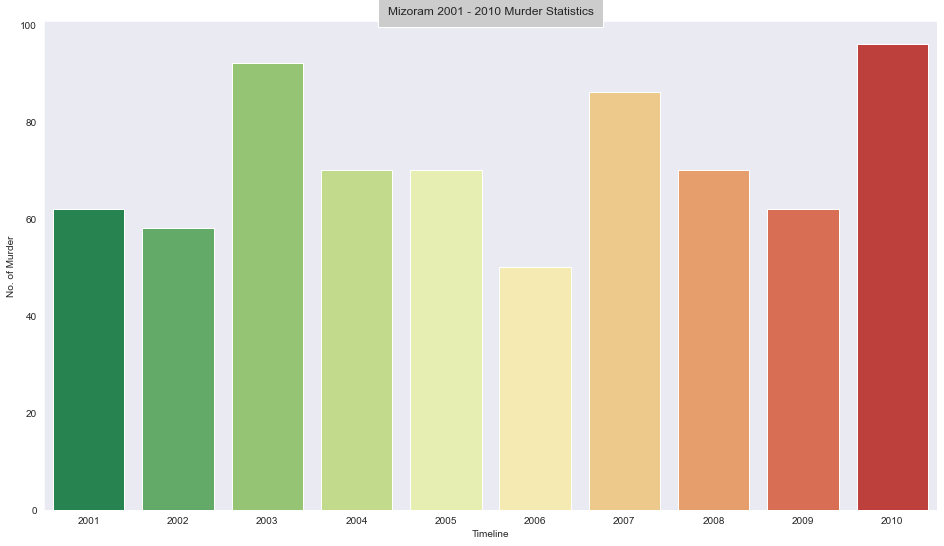

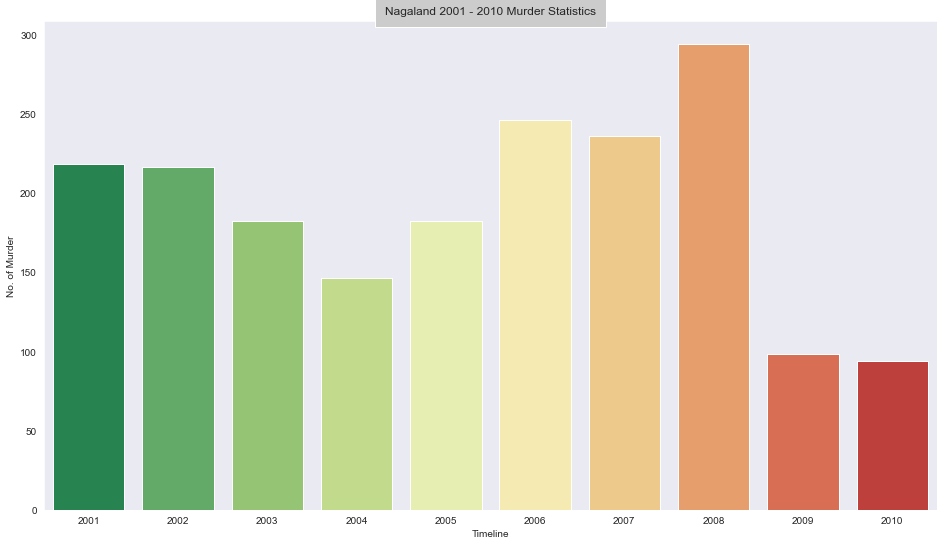

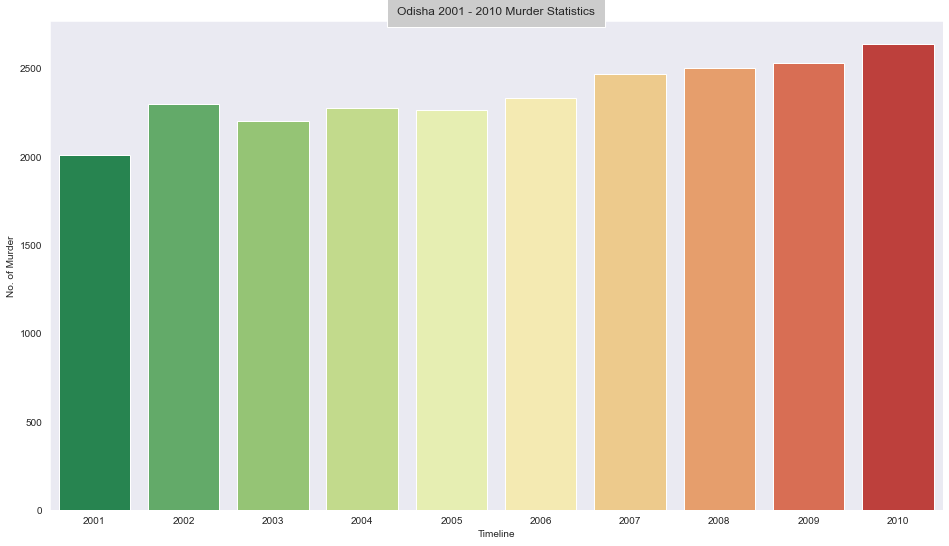

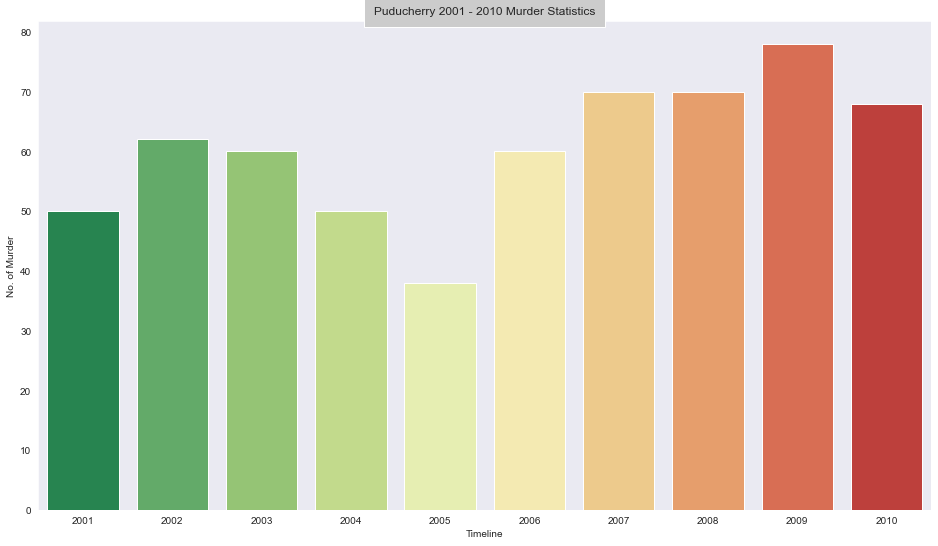

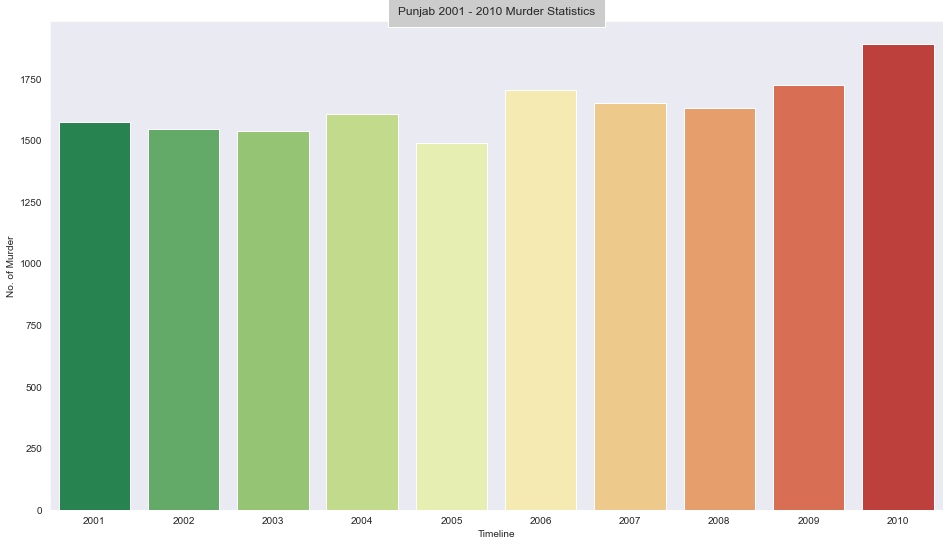

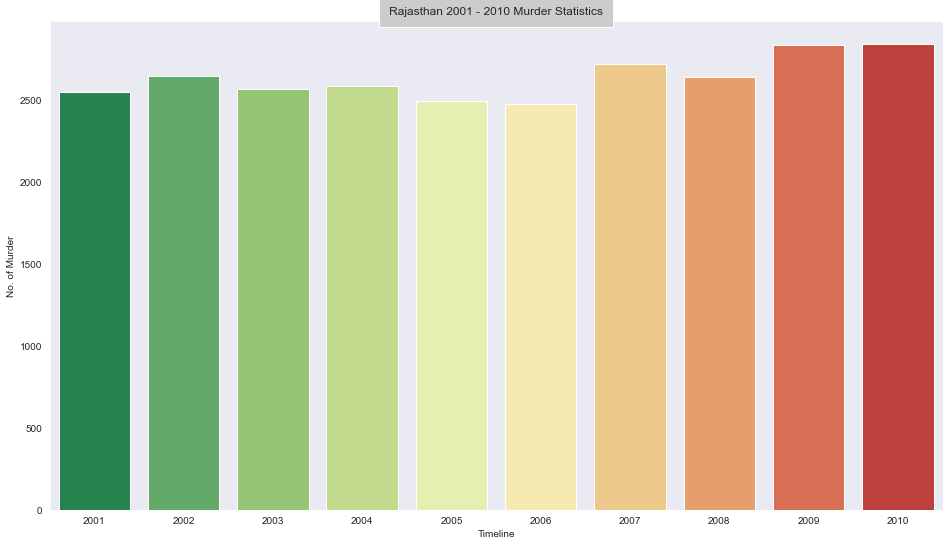

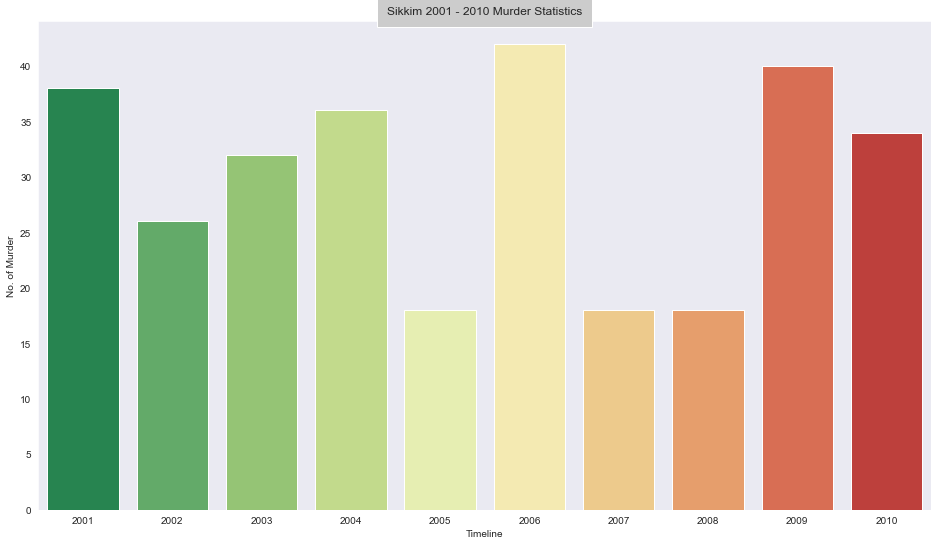

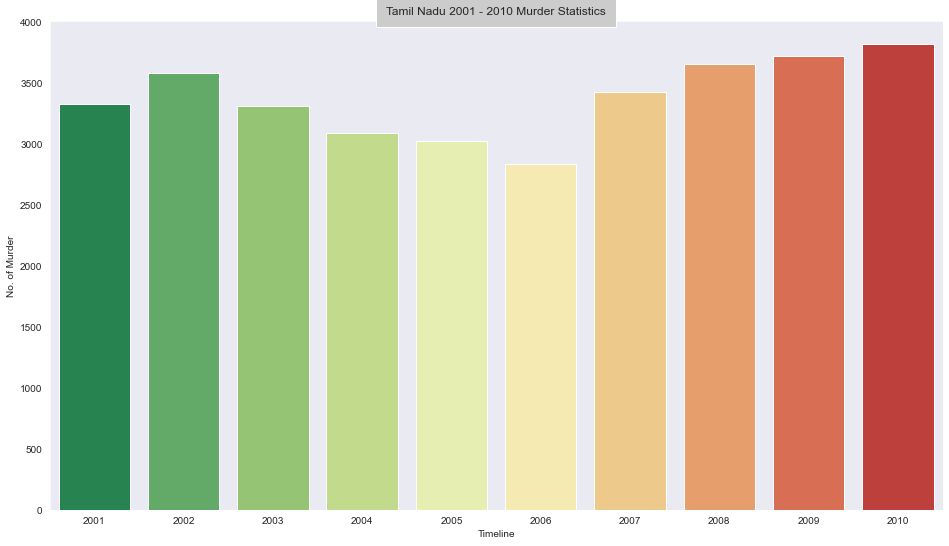

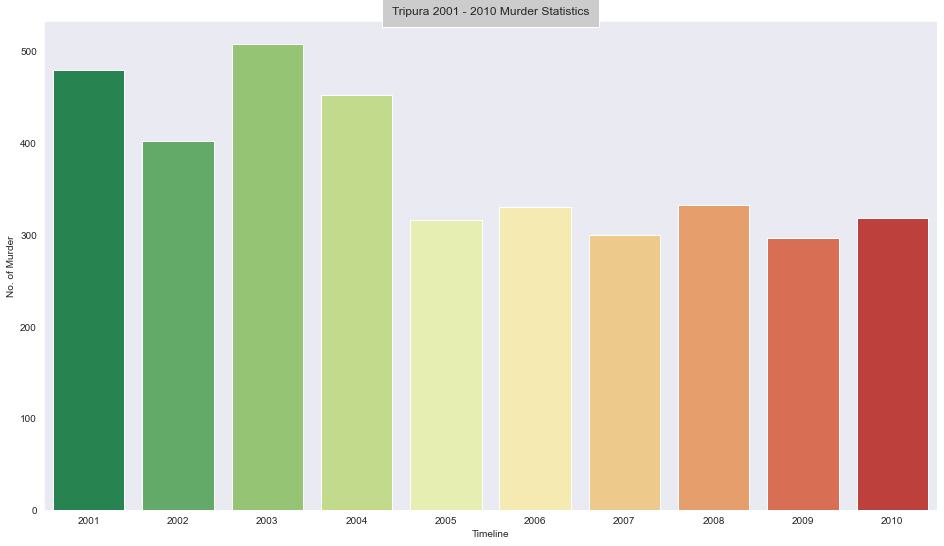

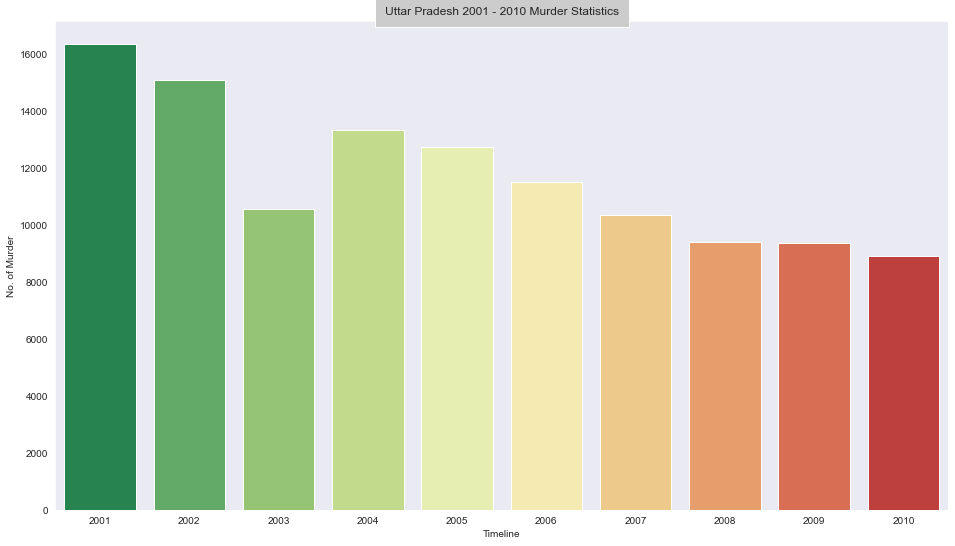

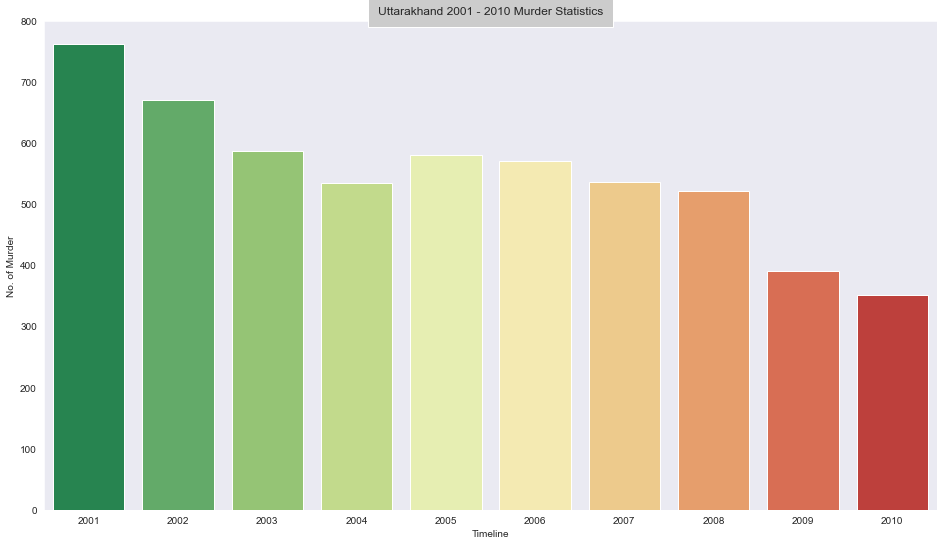

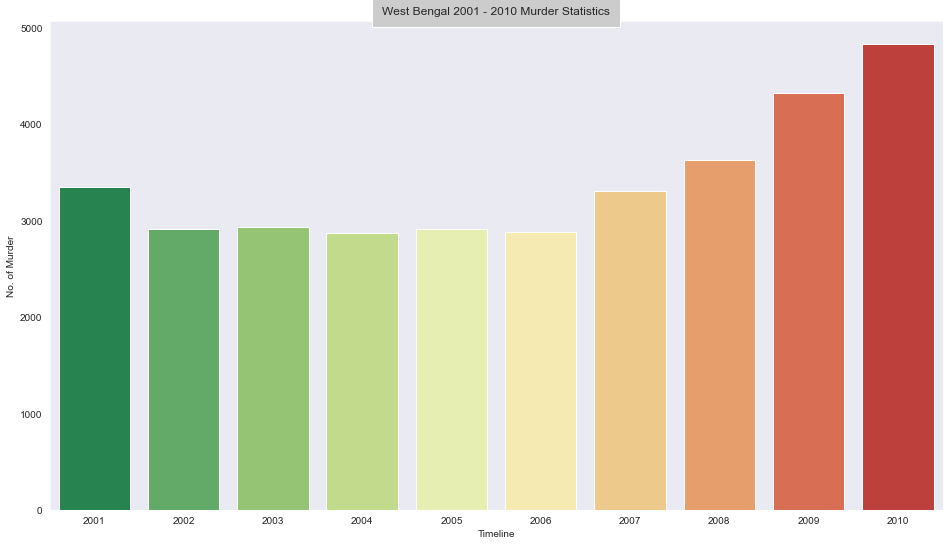

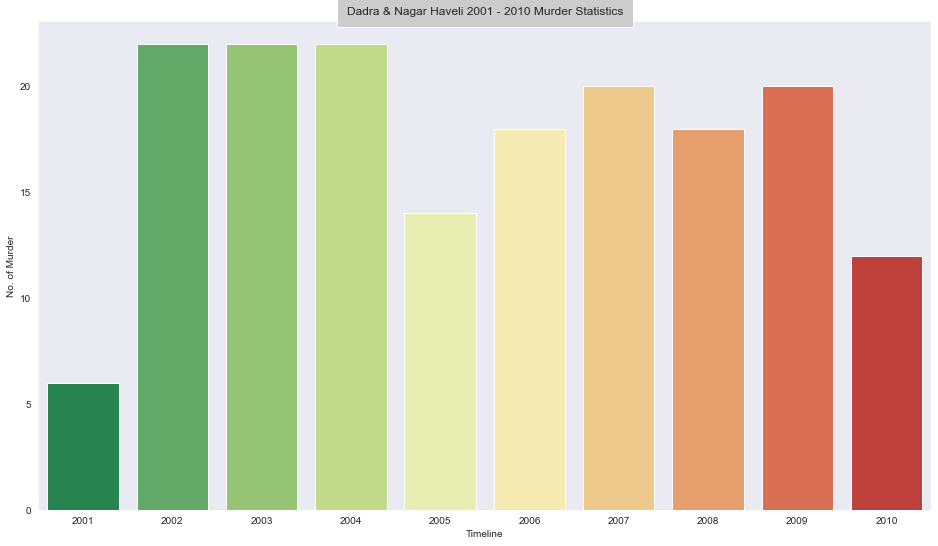

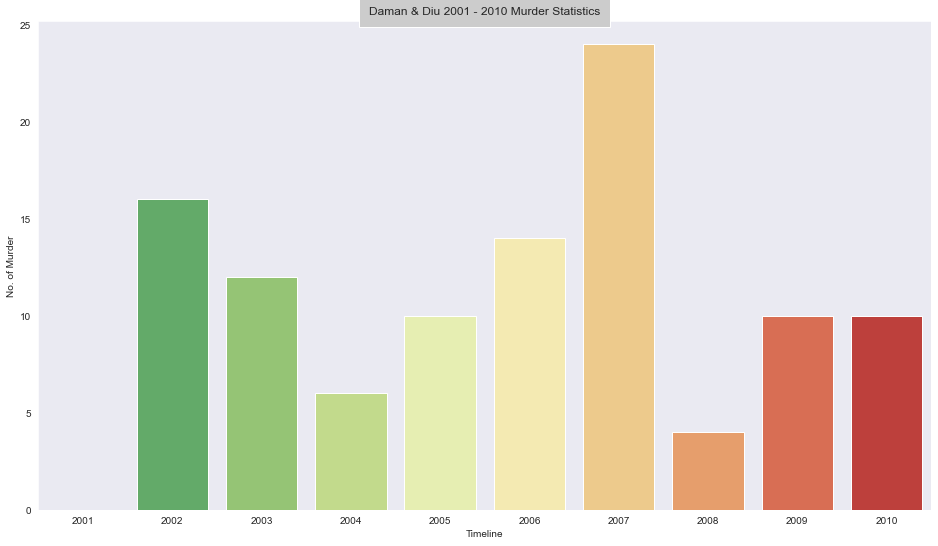

In [10]:
for i in area_names:
    state_murder_stats(i)

- <h3><b>Statewise Comparison of Yearwise Murder 2001 - 2010</b></h3>

In [11]:
def plot_detail(j):
    state = murder.iloc[:, 0].unique()
    timeline = murder.iloc[:, 1].unique()
    murders = []
    for i in state:
        new = murder[murder.iloc[:, 0] == i]
        new = new[new.iloc[:, 1] == j]
        murders.append(sum(new['Victims_Total']))
    s = str(j) + ' Statewise Murder Comparison'
    plt.figure(figsize = (16, 9))
    sns.barplot(x = state, y = murders, palette = 'rocket')
    plt.xticks(rotation = 90)
    plt.ylabel('No. of Murder')
    plt.title(s, bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
    plt.show()

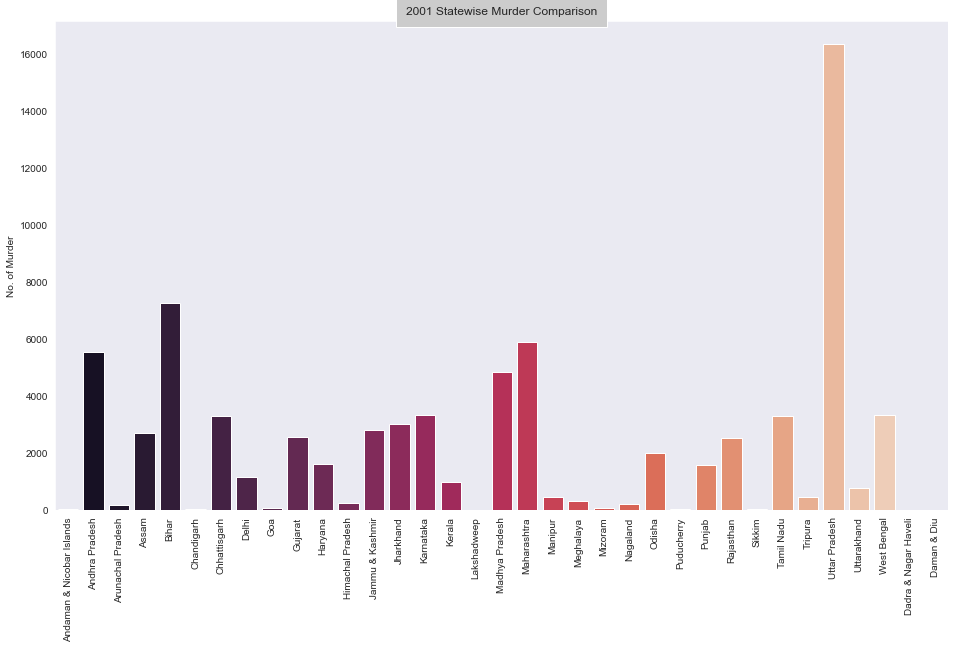

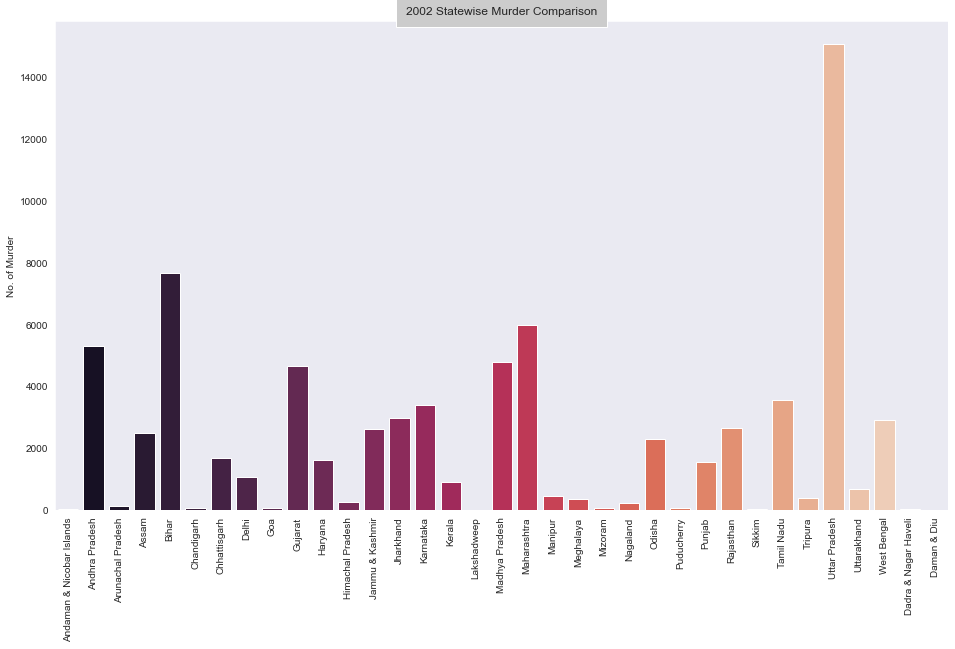

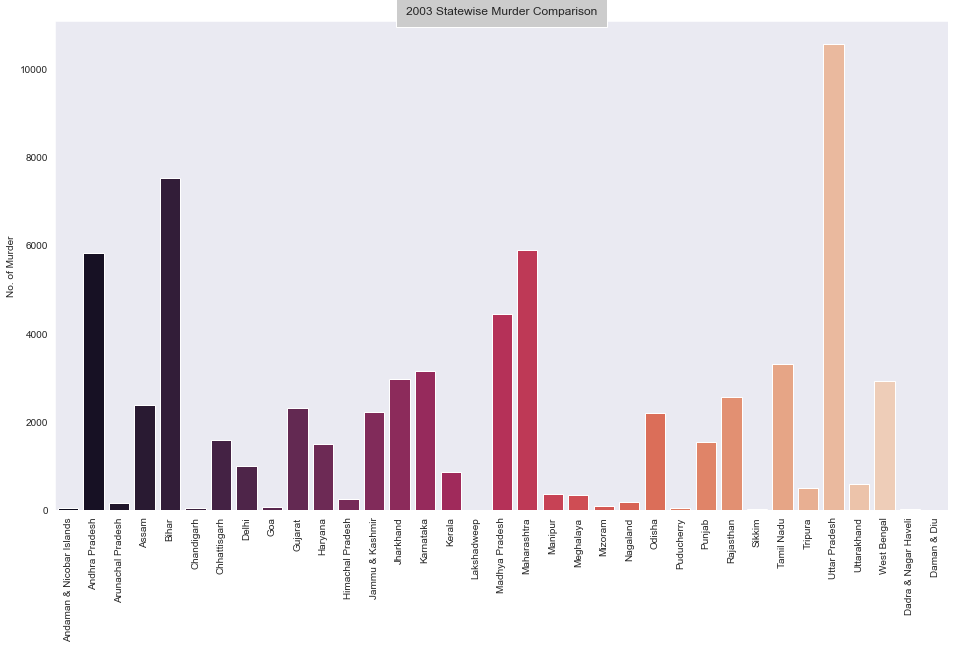

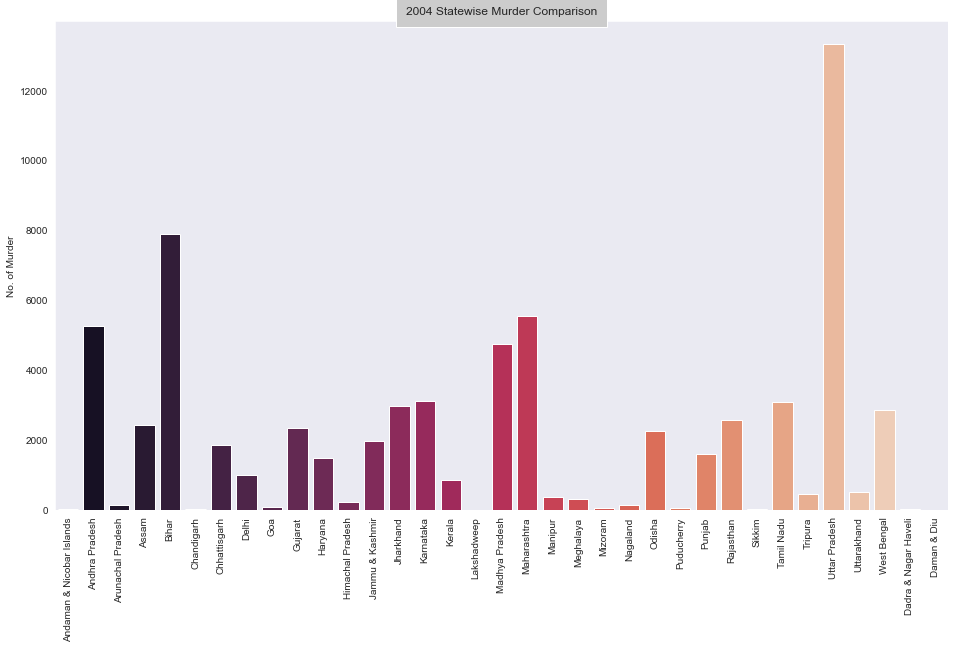

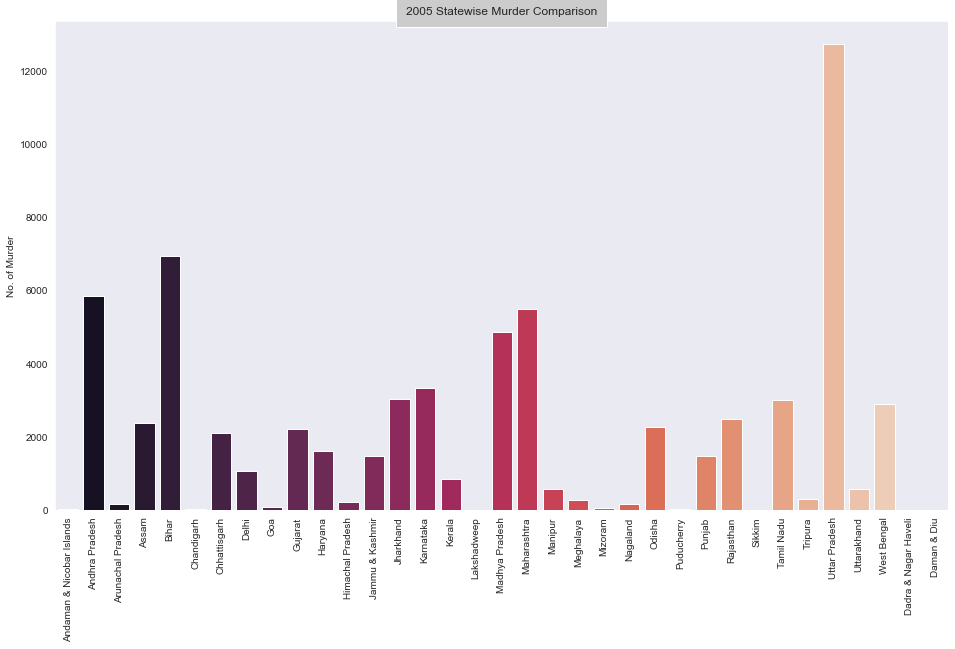

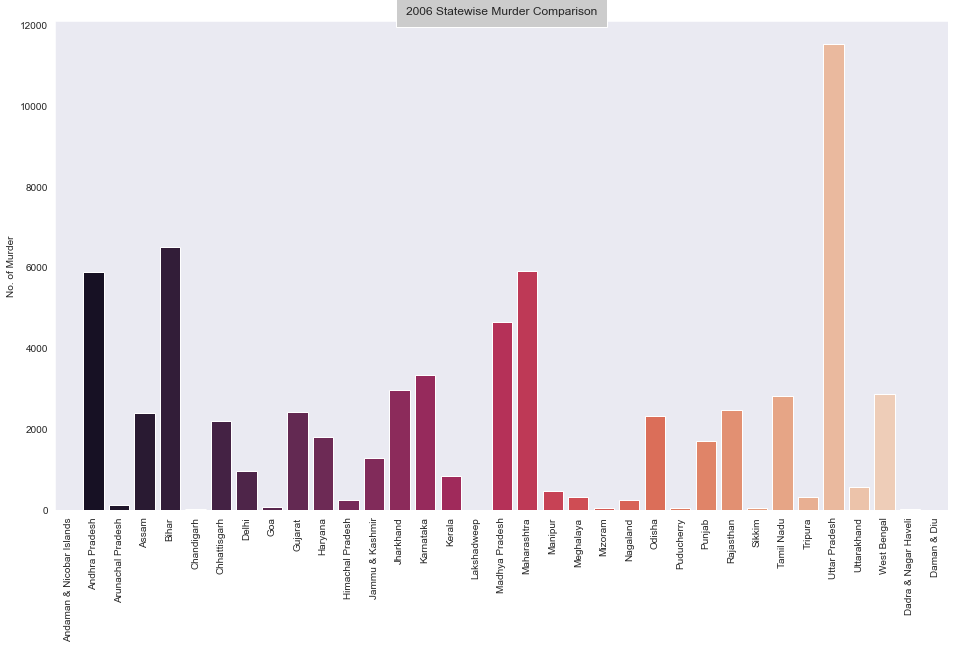

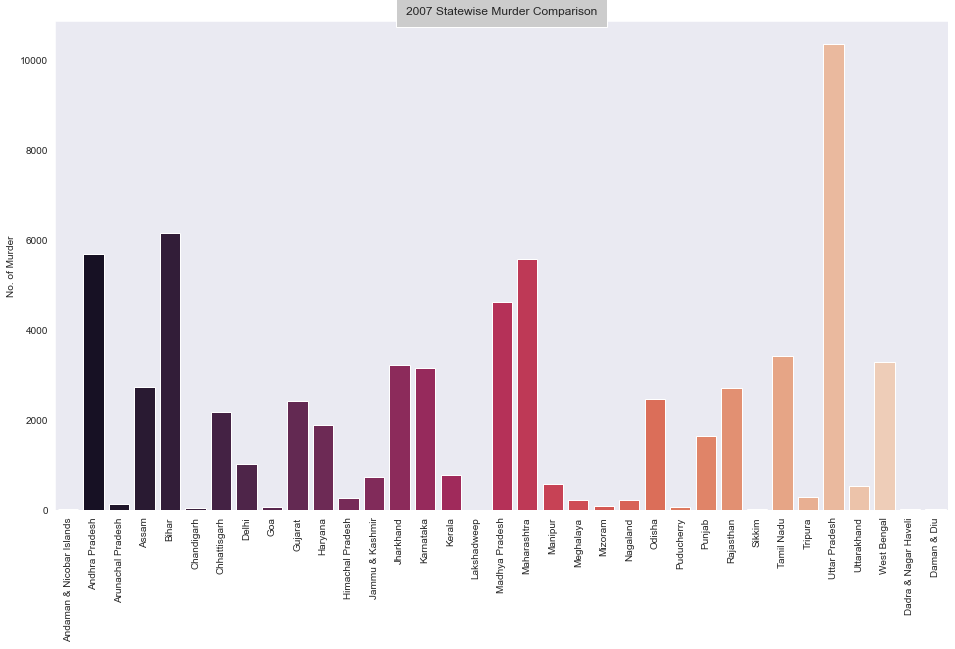

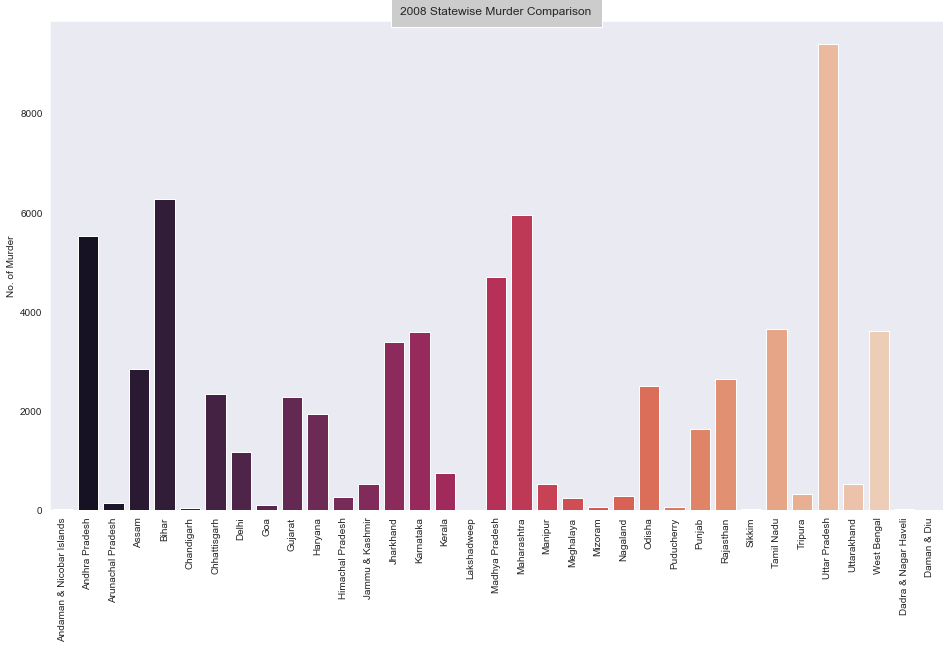

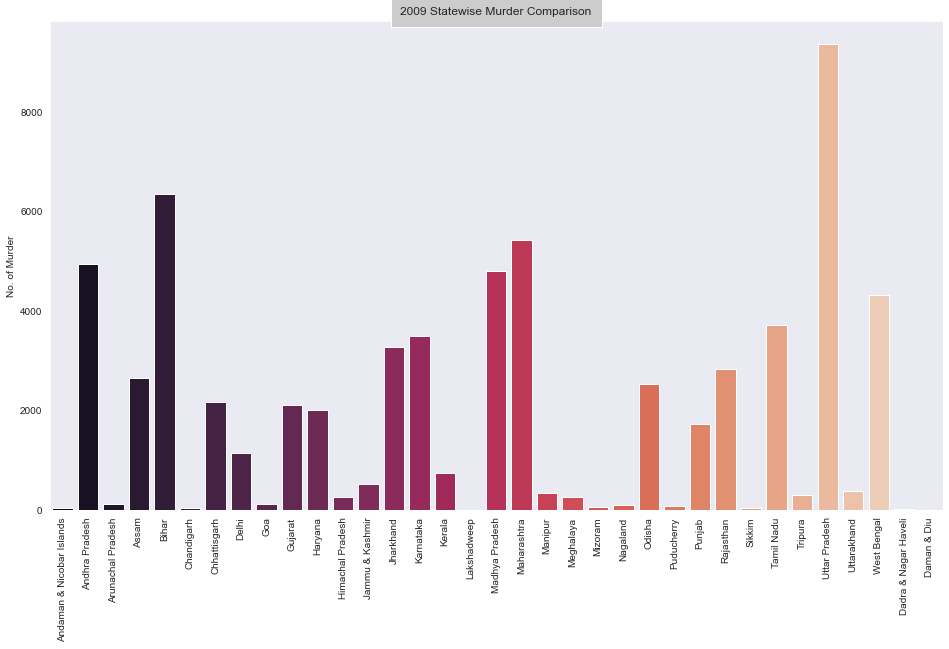

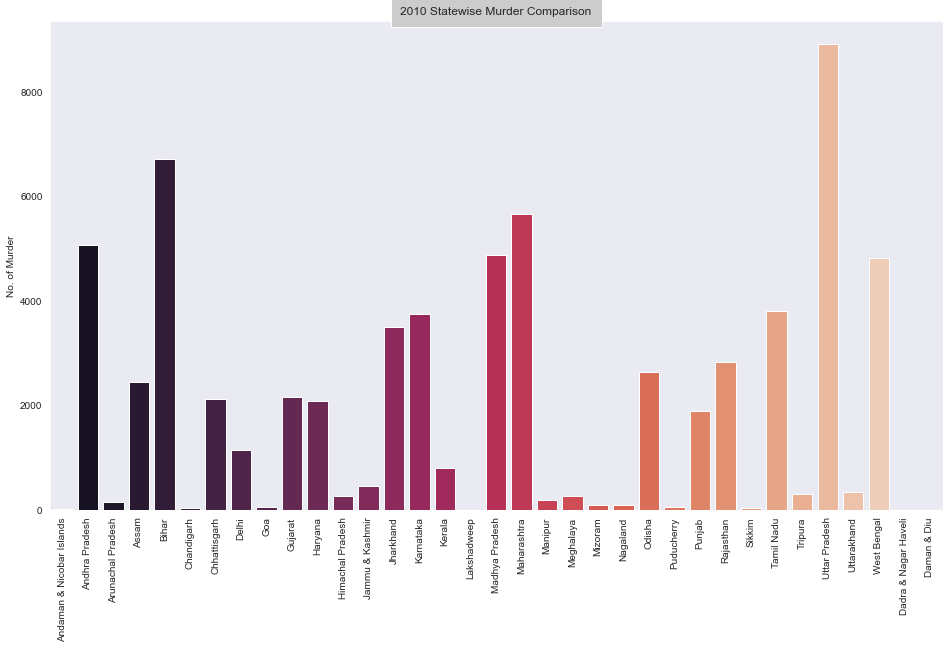

In [12]:
for i in range(2001, 2011):
    plot_detail(i)

- <h3><b>Statewise Instensity of Murder 2001 - 2010</b></h3>

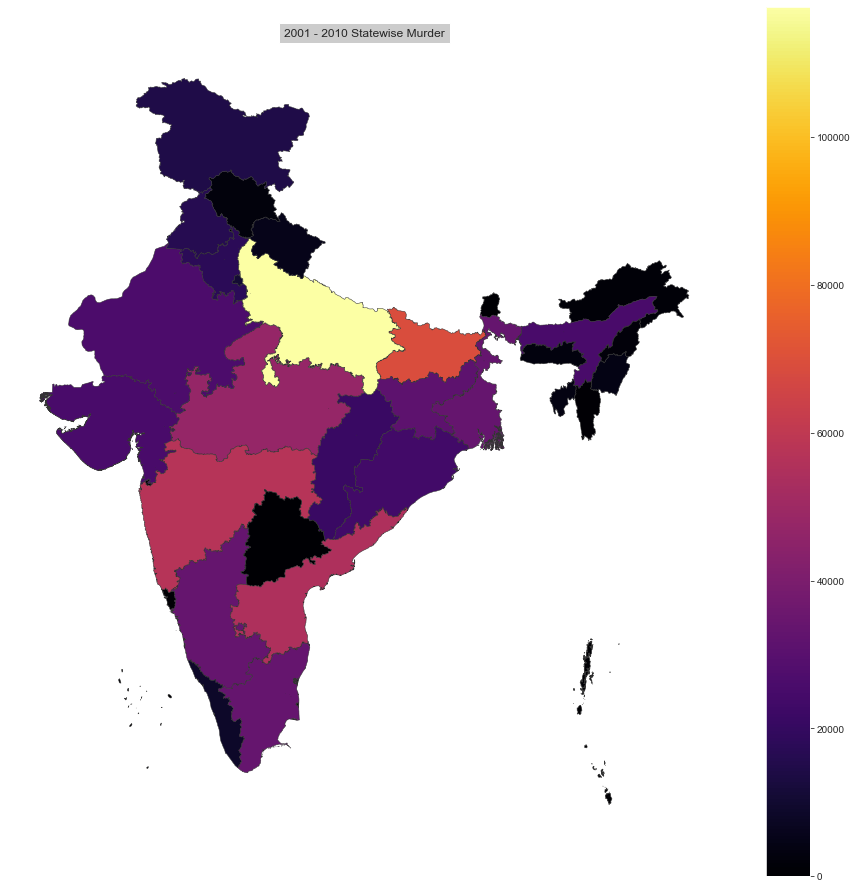

In [13]:
import geopandas as gpd
df = pd.DataFrame(list(zip(area_names, murders)), columns = ['States', 'Total Victims'])
map_file = gpd.read_file('Indian_States.shp')
merged = map_file.set_index('st_nm').join(df.set_index('States'))
na = ['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Dadara & Nagar Havelli', 'NCT of Delhi', 'Telangana']
val = [274, 1406, 174, 10792, 0]
j = 0
for i in na:
    merged.at[i, list(merged.columns)[1]] = val[j]
    j += 1
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('2001 - 2010 Statewise Murder', bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
fig = merged.plot(column='Total Victims', cmap='inferno', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

<center>For further information or query mail us at <a href = "mailto: aroy02072000@gmail.com">aroy02072000@gmail.com</a></center>


<br><center>&copy; All rights reserved by Webskitters Academy</center>